In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

path_data = '/Users/dariozappala/Library/CloudStorage/Dropbox/università/RTD-A/progetti/dati/Crunchbase/'
path_images = './immagini/'

# Lettura

In [2]:
%%time
df_jobs = pd.read_csv(path_data + 'jobs.csv')

# converte le colonne scelte da testo a Timestamp
df_jobs['started_on'] = pd.to_datetime(df_jobs['started_on'], errors = 'coerce')
df_jobs['ended_on'] = pd.to_datetime(df_jobs['ended_on'], errors = 'coerce')

CPU times: user 11.5 s, sys: 572 ms, total: 12.1 s
Wall time: 12.1 s


# Esplorazione

- `title` indica il ruolo dettagliato
- `job_type` indica la categoria generale del ruolo. Può avere 5 valori:
    - `executive` (1.869.260): Circa 723.000 ruoli con la parola 'founder'. Per il resto, ruoli dirigenziali.
    - `employee` (626.450): Ruoli vari. Circa 18.000 ruoli con la parola 'founder'.
    - `board_member` (218.030): Vari ruoli con 'member' e 'board'. Circa 8000 ruoli con 'founder'.
    - `advisor` (84.071): Quasi tutti ruoli con la parola 'advisor'. Circa 2000 'Mentor' e 1000 'founder'
    - `board_observer` (8855)

In [3]:
print(df_jobs.shape, '\n')

# Informazioni sulle date
for col in ['started_on', 'ended_on']:
    print(col)
    print(df_jobs[col].min())
    print(df_jobs[col].max())
    print("'" + col + "' < '1900-01-01':\t", (df_jobs[col] < '1900-01-01').sum())
    print()

(2806666, 17) 

started_on
1682-01-01 00:00:00
2023-09-09 00:00:00
'started_on' < '1900-01-01':	 1774

ended_on
1791-01-01 00:00:00
2023-09-01 00:00:00
'ended_on' < '1900-01-01':	 13



In [4]:
df_jobs.head()

,uuid,name,type,permalink,cb_url,rank,created_at,updated_at,person_uuid,person_name,org_uuid,org_name,started_on,ended_on,is_current,title,job_type
0,697b6934-fc1f-9d63-cfb2-1a10759b378e,Ben Elowitz Co-Founder and CEO @ Wetpaint,job,ben-elowitz-executive-wetpaint--697b6934,https://www.crunchbase.com/job/ben-elowitz-exe...,NaN,2007-05-25 07:03:54,2021-03-25 03:59:21,ed13cd36-fe2b-3707-197b-0c2d56e37a71,Ben Elowitz,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,2005-10-01,2014-06-01,False,Co-Founder and CEO,executive
1,b1de3765-442e-b556-9304-551c2a055901,Kevin Flaherty VP Marketing @ Wetpaint,job,kevin-flaherty-executive-wetpaint--b1de3765,https://www.crunchbase.com/job/kevin-flaherty-...,NaN,2007-05-25 07:04:16,2018-02-13 01:32:51,5ceca97b-493c-1446-6249-5aaa33464763,Kevin Flaherty,e1393508-30ea-8a36-3f96-dd3226033abd,Wetpaint,NaT,NaT,False,VP Marketing,executive
2,1319cd30-f5e8-c700-0af6-64029c6f7124,Raju Vegesna Chief Evangelist @ Zoho,job,raju-vegesna-employee-zoho--1319cd30,https://www.crunchbase.com/job/raju-vegesna-em...,NaN,2007-05-25 19:33:03,2018-02-13 01:19:53,9f99a98a-aa97-b30b-0d36-db67c1d277e0,Raju Vegesna,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,2000-11-01,NaT,True,Chief Evangelist,employee
3,27a252de-1ea8-c620-b2d4-5b889fa9b40f,Ian Wenig VP Business Development @ Zoho,job,ian-wenig-executive-zoho--27a252de,https://www.crunchbase.com/job/ian-wenig-execu...,NaN,2007-05-25 19:34:53,2018-02-13 01:21:35,6e1bca72-a865-b518-b305-31214ce2d1b0,Ian Wenig,bf4d7b0e-b34d-2fd8-d292-6049c4f7efc7,Zoho,2006-03-01,NaT,True,VP Business Development,executive
4,5a802a79-229f-44ae-0aba-db330f10b67a,Jay Adelson CEO @ Digg,job,jay-adelson-executive-digg--5a802a79,https://www.crunchbase.com/job/jay-adelson-exe...,NaN,2007-05-25 20:05:33,2018-02-13 01:25:38,c92a1f00-8c19-bf2e-0f28-dbbd383dc968,Jay Adelson,5f2b40b8-d1b3-d323-d81a-b7a8e89553d0,Digg,2005-07-01,2010-04-05,False,CEO,executive


In [5]:
(df_jobs.value_counts(['job_type'], sort = True, normalize = False, dropna = False))[:20]

job_type      
executive         1869260
employee           626450
board_member       218030
advisor             84071
board_observer       8855
Name: count, dtype: int64

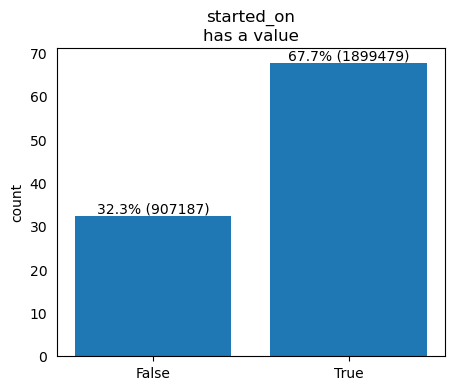

In [7]:
col = 'started_on'
#col = 'ended_on'

values, counts = np.unique(~df_jobs[col].isna(), return_counts = True)
percents = 100 * counts / counts.sum()
Delta_y = percents.max() * 1/100

fig, ax = plt.subplots(figsize = (5, 4))
ax.bar(x = range(len(values)), height = percents)
for tick in ax.yaxis.get_major_ticks():
    tick.tick1line.set_visible(False)
    tick.tick2line.set_visible(False)
ax.set_xticks(range(len(values)), values)
for i in range(len(values)):
    plt.text(i, percents[i] + Delta_y, f'{percents[i]:.1f}% ({counts[i]})', ha = 'center')
ax.set_ylabel('count')
ax.set_title(col + '\nhas a value')
plt.savefig(path_images + 'has_value.png', bbox_inches = 'tight')
plt.show()

## Ruoli

In [8]:
df_jobs_clean = df_jobs[['job_type', 'title']].copy()

In [9]:
df_jobs_clean.loc[
    df_jobs_clean['title'].str.contains('founder', case = False, na = False),
    'job_type'
] = 'founder'

(df_jobs_clean.value_counts(['job_type'], sort = True, normalize = False, dropna = False))[:20]

job_type      
executive         1146700
founder            749792
employee           608402
board_member       210017
advisor             83026
board_observer       8729
Name: count, dtype: int64

In [10]:
stats = pd.DataFrame(
    df_jobs_clean.value_counts(['job_type', 'title'], sort = True, normalize = False, dropna = False)
).reset_index()

In [12]:
i = 0
stats[stats['job_type'] == 'executive'].iloc[i:(i+20)]
#stats[stats['title'].str.contains('mentor', case = False, na = False)].iloc[i:(i+20)]
#stats[(stats['job_type'] == 'employee') & (stats['title'].str.contains('founder', case = False, na = False))].iloc[i:(i+20)]

,job_type,title,count
1,executive,CEO,117646
5,executive,Chief Executive Officer,35784
8,executive,President,31727
9,executive,CTO,30807
10,executive,Managing Director,28536
12,executive,Owner,24752
13,executive,Director,24712
14,executive,CFO,24118
16,executive,Chief Financial Officer,21094
17,executive,Partner,20669


In [21]:
stats.shape

(595715, 3)